# Descriptive and Exploratory Answers

In [10]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2

def check_condition(row):
    if row[-1] == 0:
        return False
    return True

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")

In [11]:
# only look at data points with nonzero synapse value
a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonzero_rows = csv[a, :]
nonzero_rows = nonzero_rows[1:, :]

What is the total number of synapses in our data set?

In [12]:
# Total number of synapses
print np.sum(nonzero_rows[:,4])

7704178.0


What is the maximum number of synapses at a given point in our data set?

In [13]:
# Max number of synapses
max_syn = np.argmax(nonzero_rows[:,4])
print max_syn
loc = (nonzero_rows[max_syn,0],nonzero_rows[max_syn,1],nonzero_rows[max_syn,2]);
print loc

33450
(2749.0, 1876.0, 1054.0)


What are the minimum and maximum x, y, and z values? (and thus, the set of (x,y,z) for our data set?

In [14]:
print [min(csv[1:,1]),min(csv[1:,2]),min(csv[1:,3])] #(x,y,z) minimum
print [max(csv[1:,1]),max(csv[1:,2]),max(csv[1:,3])] #(x,y,z) maximum


[1369.0, 55.0, 0.0]
[3358.0, 1165.0, 165789.0]


What does the histogram of our data look like?

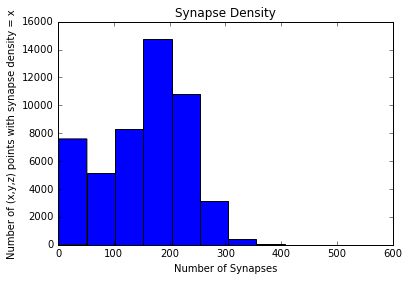

In [15]:
# Histogram
fig = plt.figure()
ax = fig.gca()
plt.hist(nonzero_rows[:,4])
ax.set_title('Synapse Density')
ax.set_xlabel('Number of Synapses')
ax.set_ylabel('Number of (x,y,z) points with synapse density = x')
plt.show()

What does the probability mass function of our data look like?

In [16]:
# PMF
syns = csv[1:,4]
sum = np.sum(syns)
density = syns/sum
mean = np.mean(density)
std = np.std(density)
print std, mean

1.1941257564e-05 1.61875161875e-05


In [17]:
#for locating synapse values of zero
def check_condition(row):
    if row[-1] == 0:
        return False
    return True

#for filtering by the mean number of synapses
def synapse_filt(row, avg):
    if row[-1] > avg:
        return True
    return False

In [18]:
samples = 5000

# only look at data points where the number of synapses is greater than avg
a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonzero_rows = csv[a, :]
avg_synapse = np.mean(nonzero_rows[1:, -1])
print avg_synapse
filter_avg_synapse = np.apply_along_axis(synapse_filt, 1,
                                         nonzero_rows, avg_synapse)
a = np.where(filter_avg_synapse == True)[0]
nonzero_filtered = nonzero_rows[a, :]
xyz_only = nonzero_filtered[:, [1, 2, 3]]

#randomly sample from the remaining data points
perm = np.random.permutation(xrange(1, len(xyz_only[:])))
xyz_only = xyz_only[perm[:samples]]
# get range for graphing
x_min = np.amin(xyz_only[:, 0])
x_max = np.amax(xyz_only[:, 0])
y_max = np.amax(xyz_only[:, 1])
y_min = np.amin(xyz_only[:, 1])
z_min = np.amin(xyz_only[:, 2])
z_max = np.amax(xyz_only[:, 2])

153.530848944


What does our data look like in a 3-D scatter plot?

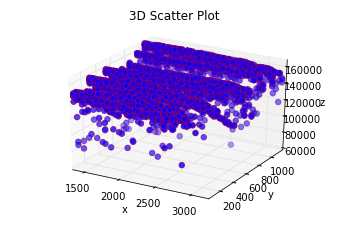

In [19]:
# following code adopted from
# https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.set_title('3D Scatter Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

ax.view_init()
ax.dist = 12  # distance

ax.scatter(
           xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
           color='purple',  # marker colour
           marker='o',  # marker shape
           s=30  # marker size
)
plt.show()  # render the plot